In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import gseapy as gp
from gseapy.plot import barplot, dotplot

In [11]:
##Genes found to be well behaved in 4 out of 5 tissues.

gene_list = ['AGT', 'LMOD1', 'SEPT6', 'PRPF31', 'FABP4', 'EIF3M', 'NFYC', 'NPRL2', 'APOC2', 
             'TNFAIP8L2', 'PARVA', 'SFRP1', 'INTS12', 'CD99L2', 'DHRS1', 'ABCA8', 'PGM5', 
             'JUP', 'PTN', 'INIP', 'TMEM201', 'GSTM1', 'CRTAC1', 'EMC3', 'MFAP5', 'ALDH1A2', 
             'POTEJ', 'BAD', 'EFEMP1', 'HACE1', 'ILK', 'GSTT2B', 'DBN1', 'ADK', 'FES', 'GNG2',
             'MED18', 'SHBG', 'HLA-DQB1', 'TUB', 'ADIRF', 'HMGN2', 'CGNL1', 'CAPN2', 'CTCF', 
             'DEFA4', 'TIMM8B', 'MRC1', 'NCAM1', 'ERAP2', 'GSTM3', 'CPNE1', 'TXNDC5', 'HMGN4',
             'CEP95', 'WDR45', 'FCN3', 'PTGR2', 'PAPSS1', 'APOF', 'MMAB', 'MYL9', 'NDUFA11', 
             'CXXC1', 'CCDC80', 'RBX1', 'LSM2', 'ACAP1', 'CD2', 'TNKS2', 'TMEM41B', 'STXBP6', 
             'CAP2', 'TSEN54', 'ANAPC2', 'ARHGAP30', 'EEF1A1', 'VWA5A', 'DYNLT1', 'RSAD1', 
             'F13A1', 'RBP7', 'FSTL1', 'PHGDH', 'SH3BP1', 'ITGAM', 'BRMS1', 'MAGED2', 'PTGDS', 
             'GNA11', 'MOXD1', 'RPS27A', 'DENND4B', 'MRPS18C', 'TAB1', 'CCL14', 'RPS8', 'DNM1',
             'RAB23', 'KYAT1', 'FBXL3', 'RERG', 'CEP120', 'ANAPC16', 'VPS29', 'RASL12', 'JPH2',
             'SPARC', 'SNX4', 'ASCC1', 'MINDY2', 'LUM', 'CDK9', 'UQCR11', 'MVB12B', 'ARPC4',
             'RABGGTA', 'COL14A1', 'MICAL1', 'PSEN1', 'SNAPC3', 'LRRC25', 'SPECC1L', 'ABHD12', 
             'CD5', 'MATN2', 'HGF', 'SNTA1', 'PODN', 'FRZB', 'COA6', 'SPEG', 'U2AF1', 'GBP3', 
             'ADAMTSL3', 'POSTN', 'RPS27L', 'PLA2G4C', 'DCTN5', 'MYOF', 'RPN2', 'WDR7', 'FIBP',
             'RPS21', 'ELMO2', 'NEXN', 'FCER1G', 'MAOB', 'MLEC', 'RBM7', 'NAE1', 'SNRK', 'RPS16',
             'FGD5', 'MZB1', 'OGFOD3', 'WWOX', 'MED14', 'SERPINF2', 'HCLS1', 'SLC25A46', 'TRAPPC12',
             'GRN', 'PXDN', 'PRUNE2', 'SCP2', 'C1QC', 'EIF3C', 'FHL5', 'TJP1', 'GPD1L', 'EIF3E',
             'STRADA', 'CYP1B1', 'F11', 'ADIPOQ', 'PDLIM7', 'SORBS1', 'LIMD2', 'ZHX3', 'CRACR2B',
             'UBALD1', 'SKIV2L', 'HSD17B11', 'ALDH1L2', 'E4F1', 'RPF2', 'PRAM1', 'MYO9A', 'FCGR2B',
             'MAPK8IP3', 'WASHC2C', 'CDA', 'PHACTR4', 'ABLIM3', 'COMP', 'CD209', 'CCL21', 'ADD1',
             'SETD7', 'TGFBR1', 'IGFBP6', 'DSTYK', 'NCLN', 'RBFA', 'CD163L1', 'TAF10', 'SSH2', 'MGLL',
             'DDX3Y', 'SELP', 'LAIR1', 'KXD1', 'ANAPC11', 'CIB1', 'RPL22', 'TYROBP', 'NQO2', 'GGA2',
             'LCP1', 'RPS4Y1', 'TTN', 'PTPRC', 'NT5C3B', 'EIF1AY', 'ALDH1A1', 'DPYSL3', 'GSTA1', 'ALOX5',
             'PGLYRP2', 'GSTM5', 'RTN1', 'SIDT2', 'ITIH1', 'MOSPD2', 'MSR1', 'DBH', 'BORCS8', 'MCL1',
             'SPN', 'CSF1R', 'PCCB', 'EVPL', 'ATP6V1C1', 'SAA1', 'XIRP2', 'C18orf21', 'C11orf98',
             'LAGE3', 'RAB3IL1', 'TIMM29', 'MYO5C', 'VPS18', 'RABL2B', 'USP53', 'DOCK2', 'DOK2', 
             'CCNC', 'ASPA', 'AIF1', 'LGALS9', 'MCAM', 'ADGRV1', 'CSTB', 'CASP7', 'ERAP1', 'UBXN2A',
             'NCF1', 'FMO1', 'SH3BGRL3', 'PSMB4', 'TNFAIP8L1', 'CORO1A', 'CORO2A', 'APBB1IP', 'PF4', 
             'APOBR', 'C8A', 'ZAP70', 'COL15A1', 'GUCY1A2', 'COTL1', 'TF', 'CCDC115', 'TMEM199',
             'GRAP2', 'HUS1', 'ICAM3', 'C8G', 'ACAD11', 'INHBC', 'IL33', 'STARD13', 'PFN1', 'CNRIP1', 
             'FERMT3', 'CTSH', 'RAPGEF3', 'GTF2A2', 'NCKAP1L', 'PROC', 'COMMD8', 'PTPN6', 'VAV1', 'CD48',
             'CYBB', 'HVCN1', 'SGCE', 'COMMD10', 'RASAL3', 'CCDC61', 'CYBA', 'LILRB5', 'HPGDS', 'F2',
             'THUMPD2', 'C12orf4', 'RRAGD', 'GANAB', 'DHDDS', 'ARHGAP6', 'FOS', 'IRF8', 'MYO1F', 'ATP9B', 
             'EBF1', 'TGFBR3', 'LSAMP', 'FABP5', 'PKD2', 'SELENOP', 'ARHGEF37', 'MLST8', 'RFESD', 'TGM2',
             'BLOC1S4', 'BBS5', 'ITGA1', 'COMMD9', 'SYNC', 'MYO9B', 'COMMD6', 'RNF7', 'POLR2E', 'ENAH',
             'AOC3', 'ARL8B', 'MSL3', 'MAPK3', 'NAA38', 'MAPT', 'RILPL1', 'LTA4H', 'FOLR2', 'LPA', 'MANF',
             'IFT52', 'CDK2AP1', 'HMBOX1', 'INO80D', 'KLHL42', 'ANXA9', 'GZMK', 'DCXR', 'MMRN1', 'GAA', 
             'MMRN2', 'NEBL', 'KRT2', 'PTGIS', 'DCLK1', 'CES1', 'CFH', 'VTN', 'NUDT2', 'ITGA7']

In [14]:
len(gene_list)

376

In [15]:
tumor_enr = gp.enrichr(gene_list = gene_list, description='', gene_sets='KEGG_2016', 
                       outdir='test/enrichr_kegg')

In [16]:
tumor_enr.res2d.head(20)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2016,Complement and coagulation cascades Homo sapie...,11/79,2.579984e-07,0.000076,0,0,7.406410,112.357554,VTN;ITGAM;C8G;PROC;CFH;SERPINF2;F11;F13A1;F2;C...
1,KEGG_2016,Phagosome Homo sapiens hsa04145,12/154,3.570949e-05,0.005231,0,0,4.144791,42.443054,COMP;MSR1;ITGAM;NCF1;CD209;MRC1;CYBB;CYBA;FCGR...
2,KEGG_2016,Osteoclast differentiation Homo sapiens hsa04380,11/132,4.069408e-05,0.003974,0,0,4.432624,44.811294,CSF1R;TYROBP;NCF1;CYBB;CYBA;TAB1;FOS;FCGR2B;TG...
3,KEGG_2016,Drug metabolism - cytochrome P450 Homo sapiens...,8/69,4.454913e-05,0.003263,0,0,6.167129,61.787961,GSTM3;HPGDS;GSTM1;MAOB;GSTA1;FMO1;GSTT2B;GSTM5
4,KEGG_2016,Leishmaniasis Homo sapiens hsa05140,8/73,6.709618e-05,0.003932,0,0,5.829204,56.015060,ITGAM;NCF1;CYBA;PTPN6;FOS;TAB1;HLA-DQB1;MAPK3
5,KEGG_2016,Glutathione metabolism Homo sapiens hsa00480,6/52,4.163002e-04,0.020329,0,0,6.137480,47.774779,GSTM3;HPGDS;GSTM1;GSTA1;GSTT2B;GSTM5
6,KEGG_2016,Metabolism of xenobiotics by cytochrome P450 H...,7/73,4.406204e-04,0.018443,0,0,5.100554,39.413646,GSTM3;HPGDS;GSTM1;GSTA1;CYP1B1;GSTT2B;GSTM5
7,KEGG_2016,Focal adhesion Homo sapiens hsa04510,12/202,4.615762e-04,0.016905,0,0,3.159890,24.270687,COMP;VTN;BAD;HGF;ITGA1;CAPN2;ILK;ITGA7;PARVA;M...
8,KEGG_2016,Prion diseases Homo sapiens hsa05020,5/35,4.666661e-04,0.015193,0,0,7.598784,58.281888,C8G;NCAM1;C8A;MAPK3;C1QC
9,KEGG_2016,Staphylococcus aureus infection Homo sapiens h...,6/56,6.234053e-04,0.018266,0,0,5.699088,42.061059,SELP;ITGAM;CFH;FCGR2B;HLA-DQB1;C1QC


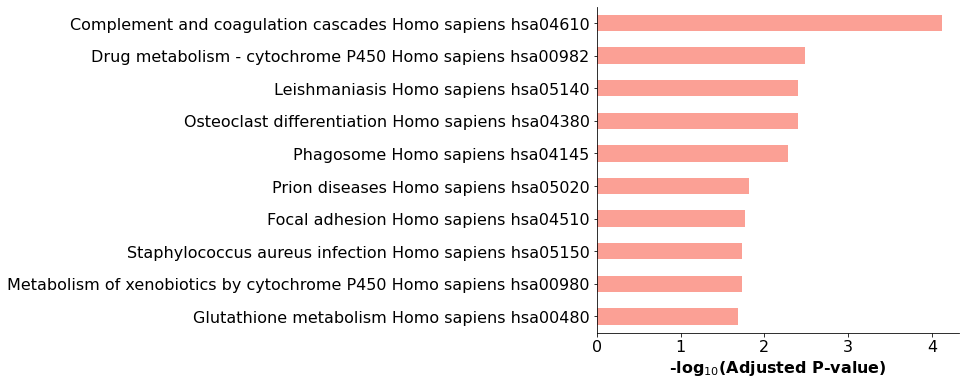

In [17]:
barplot(tumor_enr.res2d)
plt.show()

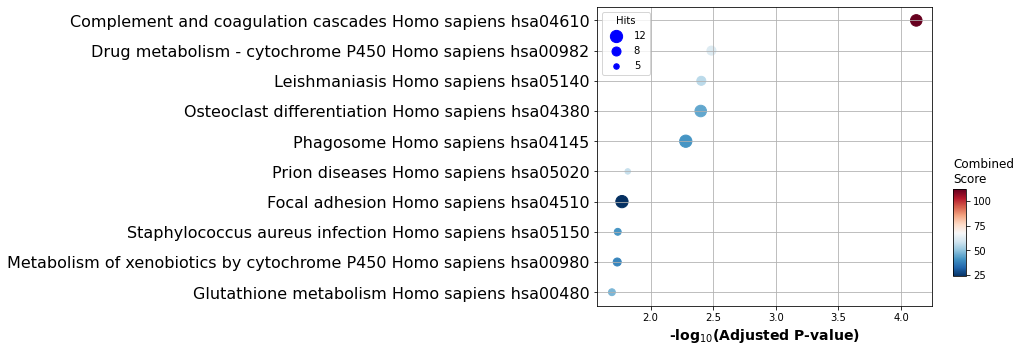

In [18]:
dotplot(tumor_enr.res2d)
plt.show()